<a href="https://colab.research.google.com/github/techbrothers3/phone-price-prediction-ml-kaggle-ex/blob/main/Phone_price_prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Dataset:

This dataset contains phone features including price of popular brands. Every phone in this dataset continues to be manufactured. Does not include discontinued phones.

In [38]:
df = pd.read_csv("cleaned_all_phones.csv")

In [39]:
df.describe()

,inches,battery,ram(GB),weight(g),storage(GB),price(USD)
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,6.422460,4389.798942,6.683862,187.636243,109.164683,337.847036
std,0.477043,784.607022,2.701433,26.200115,74.436484,266.740821
min,3.800000,1821.000000,1.000000,130.000000,1.000000,40.000000
25%,6.300000,4000.000000,4.000000,175.000000,64.000000,179.997500
50%,6.500000,4500.000000,8.000000,187.000000,128.000000,260.000000
75%,6.670000,5000.000000,8.000000,197.250000,128.000000,400.000000
max,10.400000,7250.000000,24.000000,500.000000,512.000000,2300.000000


In [40]:
df.isnull().sum()

phone_name           0
brand                0
os                   0
inches               0
resolution           0
battery              0
battery_type         0
ram(GB)              0
announcement_date    0
weight(g)            0
storage(GB)          0
video_720p           0
video_1080p          0
video_4K             0
video_8K             0
video_30fps          0
video_60fps          0
video_120fps         0
video_240fps         0
video_480fps         0
video_960fps         0
price(USD)           0
dtype: int64

In [41]:
df.duplicated().sum()


0

In [42]:
# if there are any wrong categorical values
df['phone_name'].value_counts()

V30                         3
K5                          2
7 Pro                       2
9                           2
6                           2
                           ..
Galaxy A11                  1
Redmi Note 9 Pro (India)    1
Redmi Note 9 Pro Max        1
Find X2                     1
vivo iQOO Z7 Pro            1
Name: phone_name, Length: 1496, dtype: int64

In [43]:
df[df['phone_name'] ==  'V30']

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
53,V30,LG,Android 7.1.2,6.00,1440x2880,3300,Li-Po,4,2017-08-31,158.0,...,True,True,False,True,True,True,False,False,False,200.0
433,V30,Honor,Android 10,6.57,1080x2400,4200,Li-Po,8,2019-11-01,213.0,...,True,True,False,True,True,False,False,False,True,430.0
1376,V30,Realme,Android 12,6.50,720x1600,5000,Li-Po,8,2023-02-09,186.0,...,True,False,False,True,False,False,False,False,False,150.0


In [44]:
df[df['phone_name'] ==  'K5']

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
112,K5,Lenovo,Android 7.1,5.7,720x1440,3000,Li-Ion,3,2018-03-01,160.0,...,False,False,False,True,False,False,False,False,False,150.0
415,K5,Oppo,Android 9.0,6.4,1080x2340,4000,Li-Po,8,2019-10-01,182.0,...,True,True,False,True,True,True,False,False,True,340.0


In [45]:
df[df['phone_name'] ==  '9']

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
805,9,OnePlus,Android 11,6.55,1080x2400,4500,Li-Po,8,2021-03-23,192.0,...,True,True,True,True,True,True,True,False,False,304.20
1136,9,Realme,Android 12,6.40,1080x2400,5000,Li-Po,8,2022-04-07,178.0,...,True,False,False,True,False,False,False,False,False,249.96


In [46]:
"""drop the phone name column since it contains unique
identifiers that dont contribute to predictive value"""

df.drop(['phone_name'], inplace=True, axis = 1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1512 non-null   object 
 1   os                 1512 non-null   object 
 2   inches             1512 non-null   float64
 3   resolution         1512 non-null   object 
 4   battery            1512 non-null   int64  
 5   battery_type       1512 non-null   object 
 6   ram(GB)            1512 non-null   int64  
 7   announcement_date  1512 non-null   object 
 8   weight(g)          1512 non-null   float64
 9   storage(GB)        1512 non-null   int64  
 10  video_720p         1512 non-null   bool   
 11  video_1080p        1512 non-null   bool   
 12  video_4K           1512 non-null   bool   
 13  video_8K           1512 non-null   bool   
 14  video_30fps        1512 non-null   bool   
 15  video_60fps        1512 non-null   bool   
 16  video_120fps       1512 

In [48]:
df['brand']

0       Huawei
1           LG
2       Huawei
3       Xiaomi
4       Huawei
         ...  
1507      Vivo
1508    Realme
1509    Realme
1510    Realme
1511      Vivo
Name: brand, Length: 1512, dtype: object

<Axes: xlabel='price(USD)', ylabel='Count'>

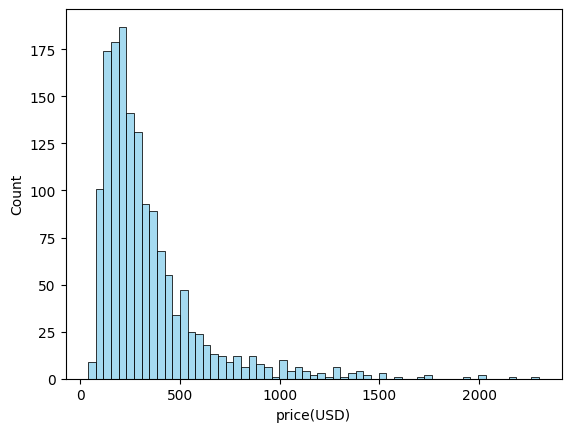

In [49]:
sns.histplot(df['price(USD)'], color='skyblue')

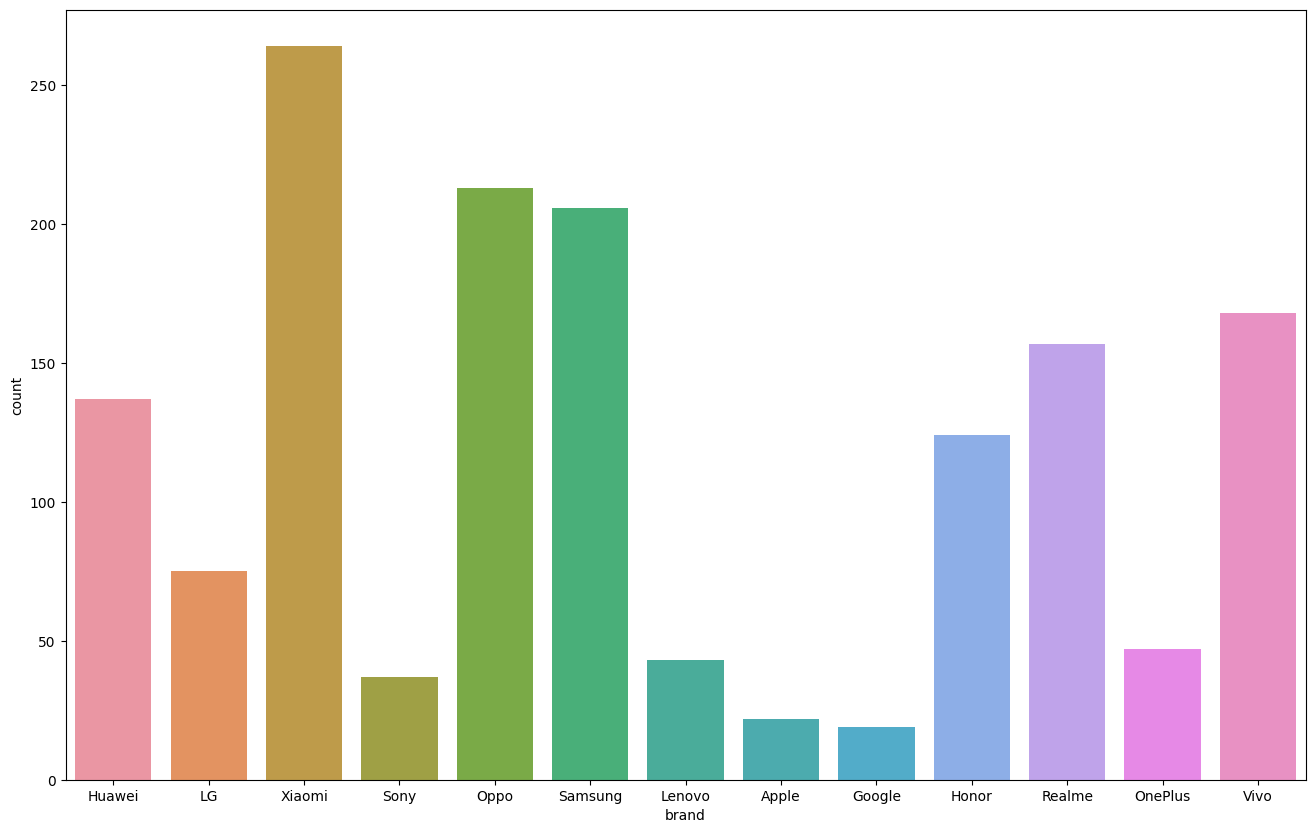

In [50]:
# prices range from around $100 to $2000
# peak around $200-300 range
# some high end outlier phones over $1000


plt.figure(figsize=(16,10))
ax = sns.countplot(x ='brand', data = df)


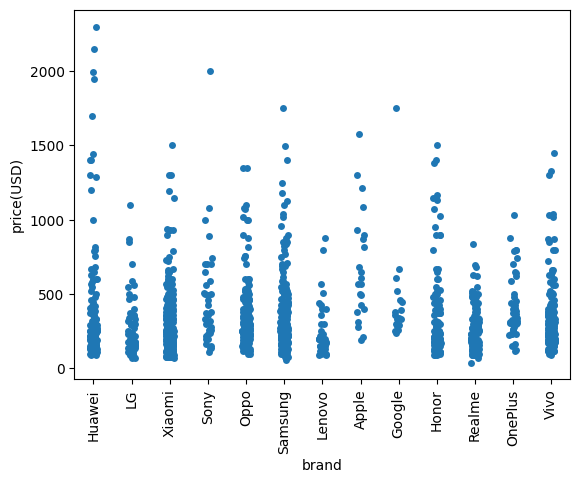

In [51]:
  # plotting brand vs price
  # here we try to understand what are the price ranges for each brand

sns.stripplot(x='brand', y='price(USD)', data = df);
plt.xticks(rotation=90)
plt.show()

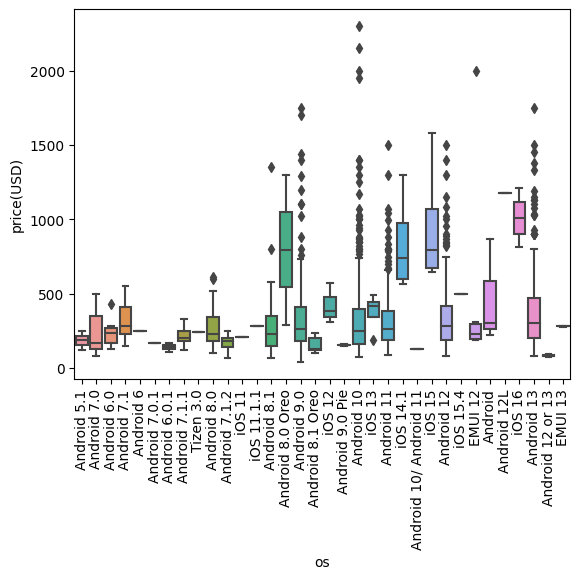

In [52]:
# here we observe that huawei phones might have a lot of outliers

# plotting box plot OS VS PRICE

sns.boxplot(x='os', y='price(USD)', data = df)
plt.xticks(rotation=90)
plt.show()

In [53]:
# ios16 has highest price in Apple devices and Android 8.0 Oreo for non android devices.

# removing the announcement_date as only the year is enough for prediction
df['announcement_year'] = df['announcement_date'].apply(lambda x: x.split('-')[0]).astype('int32')


In [54]:
df['announcement_year']

0       2016
1       2016
2       2017
3       2017
4       2017
        ... 
1507    2023
1508    2023
1509    2023
1510    2023
1511    2023
Name: announcement_year, Length: 1512, dtype: int32

In [55]:
df.drop(['announcement_date'], inplace=True, axis=1)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1512 non-null   object 
 1   os                 1512 non-null   object 
 2   inches             1512 non-null   float64
 3   resolution         1512 non-null   object 
 4   battery            1512 non-null   int64  
 5   battery_type       1512 non-null   object 
 6   ram(GB)            1512 non-null   int64  
 7   weight(g)          1512 non-null   float64
 8   storage(GB)        1512 non-null   int64  
 9   video_720p         1512 non-null   bool   
 10  video_1080p        1512 non-null   bool   
 11  video_4K           1512 non-null   bool   
 12  video_8K           1512 non-null   bool   
 13  video_30fps        1512 non-null   bool   
 14  video_60fps        1512 non-null   bool   
 15  video_120fps       1512 non-null   bool   
 16  video_240fps       1512 

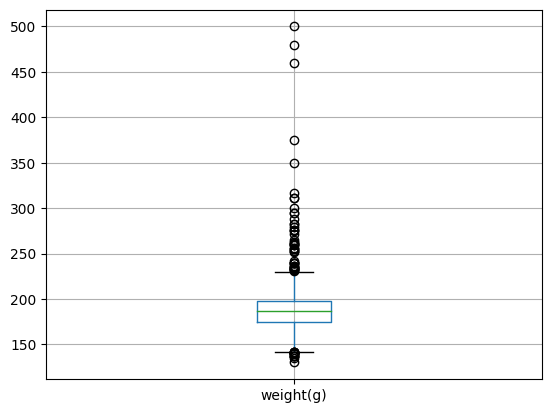

In [57]:
# box plot for weight

df.boxplot(['weight(g)']);

In [58]:
# checking for outliers
Outliers_W = df[df['weight(g)'] > 450]
Outliers_W

,brand,os,inches,resolution,battery,battery_type,ram(GB),weight(g),storage(GB),video_720p,...,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD),announcement_year
78,Lenovo,Android 7.0,10.1,1200x1920,7000,Li-Ion,2,500.0,32,False,...,False,False,True,False,False,False,False,False,170.0,2017
516,Lenovo,Android 9.0,10.3,1200x1920,5000,Li-Po,4,460.0,32,False,...,False,False,True,False,False,False,False,False,180.0,2020
573,Honor,Android 10,10.4,1200x2000,7250,Li-Po,8,480.0,64,False,...,False,False,True,False,False,False,False,False,280.0,2020


<Axes: >

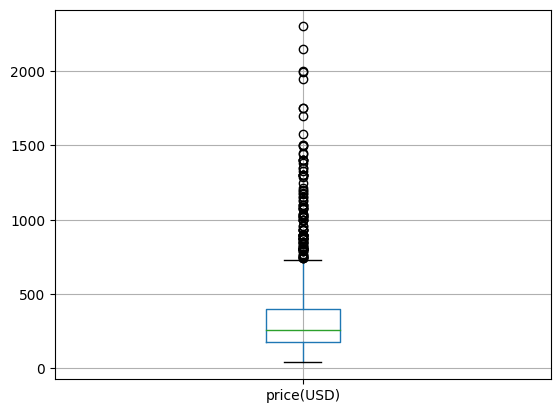

In [59]:
df.boxplot(['price(USD)'])

In [60]:
Outliers_P = df[df['price(USD)'] > 1400]
Outliers_P

,brand,os,inches,resolution,battery,battery_type,ram(GB),weight(g),storage(GB),video_720p,...,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD),announcement_year
379,Samsung,Android 9.0,6.40,720x1560,4000,Li-Ion,3,169.0,32,False,...,False,False,True,False,False,False,False,False,1750.00,2019
421,Huawei,Android 9.0,6.26,1080x2340,4000,Li-Po,6,178.0,64,True,...,True,False,True,False,False,False,False,False,1700.00,2019
428,Huawei,Android 9.0,6.30,1080x2400,4000,Li-Po,8,163.0,64,False,...,False,False,True,False,False,False,False,False,1440.00,2019
442,Huawei,Android 10,6.57,1080x2400,4200,Li-Po,8,212.0,128,True,...,True,False,True,True,False,False,False,True,2150.00,2019
487,Sony,Android 10,6.50,1644x3840,4000,Li-Po,12,225.0,512,True,...,True,False,False,True,True,False,False,False,2000.00,2020
492,Huawei,Android 10,6.40,1080x2310,4200,Li-Po,8,183.0,128,False,...,False,False,True,False,False,False,False,False,1950.00,2020
777,Huawei,Android 10,6.10,1080x2340,3800,Li-Po,8,175.0,128,True,...,True,False,False,True,False,False,False,True,2300.00,2021
815,Xiaomi,Android 11,6.81,1440x3200,5000,Li-Po,8,234.0,256,True,...,True,True,False,True,False,False,False,False,1500.00,2021
950,Apple,iOS 15,6.10,1170x2532,3095,Li-Ion,6,204.0,128,True,...,True,False,True,True,True,True,False,False,1580.09,2021
1166,Huawei,EMUI 12,7.80,2200x2480,4880,Li-Po,8,255.0,256,True,...,True,False,True,True,True,True,False,False,1995.99,2022


In [61]:
df.drop('resolution', inplace=True, axis=1)

In [62]:
df.describe()

,inches,battery,ram(GB),weight(g),storage(GB),price(USD),announcement_year
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,6.422460,4389.798942,6.683862,187.636243,109.164683,337.847036,2020.410053
std,0.477043,784.607022,2.701433,26.200115,74.436484,266.740821,1.700190
min,3.800000,1821.000000,1.000000,130.000000,1.000000,40.000000,2016.000000
25%,6.300000,4000.000000,4.000000,175.000000,64.000000,179.997500,2019.000000
50%,6.500000,4500.000000,8.000000,187.000000,128.000000,260.000000,2021.000000
75%,6.670000,5000.000000,8.000000,197.250000,128.000000,400.000000,2022.000000
max,10.400000,7250.000000,24.000000,500.000000,512.000000,2300.000000,2023.000000


In [63]:
# getting all the numerical(int and float) columns to remove outliers

num_cols = list(df.select_dtypes(include = ['int64', 'float64']).columns)
num_cols

['inches', 'battery', 'ram(GB)', 'weight(g)', 'storage(GB)', 'price(USD)']

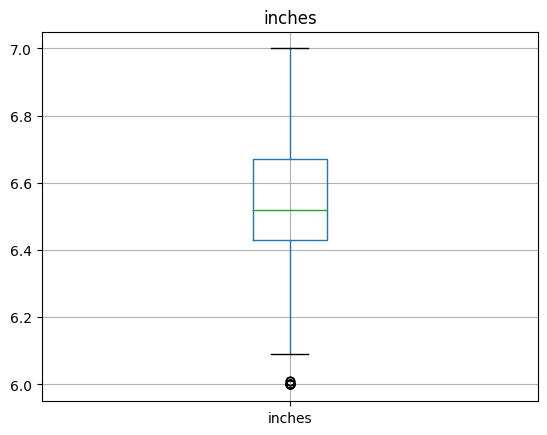

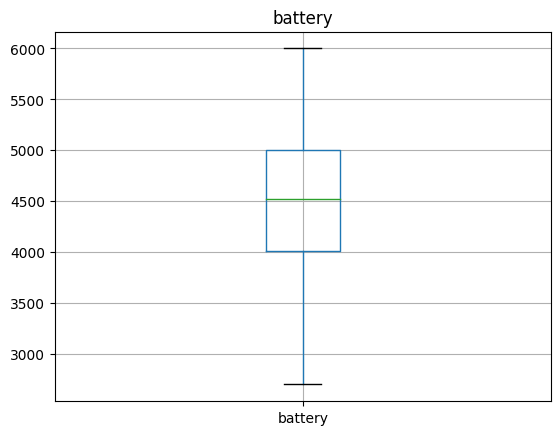

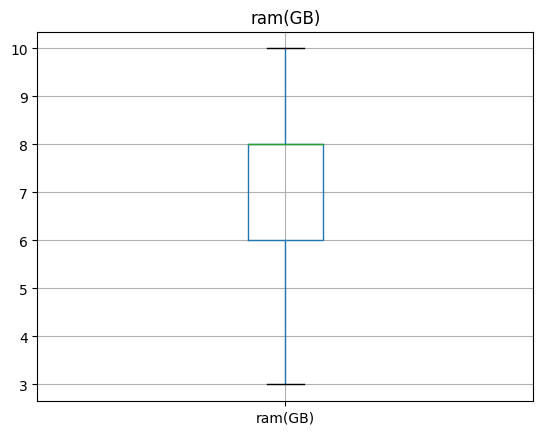

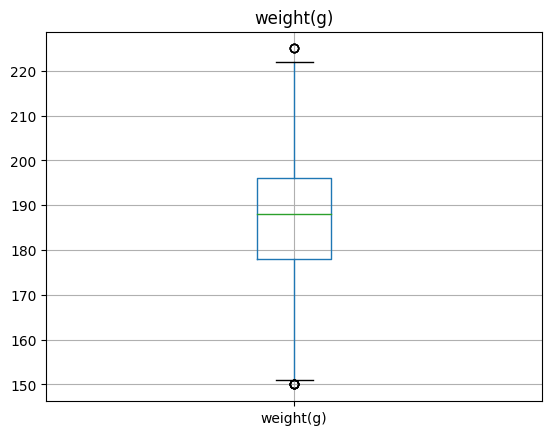

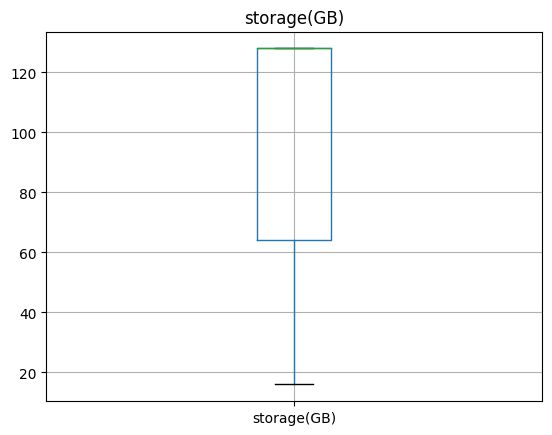

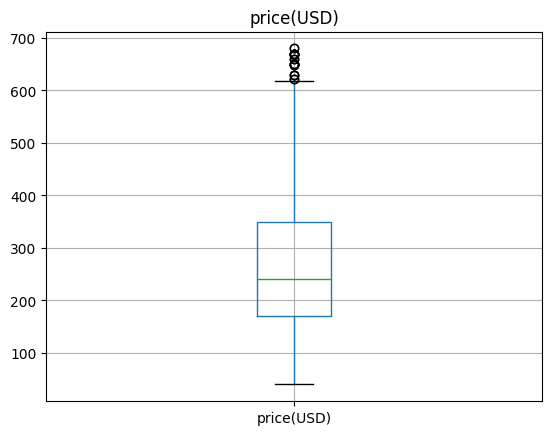

In [67]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Removing the outliers
    df.drop(df[(df[col] < lower) | (df[col] > upper)].index, inplace=True)


    plt.figure()
    df.boxplot([col])
    plt.title(col)


# Resetting the index
df = df.reset_index(drop=True)




In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1054 non-null   object 
 1   os                 1054 non-null   object 
 2   inches             1054 non-null   float64
 3   battery            1054 non-null   int64  
 4   battery_type       1054 non-null   object 
 5   ram(GB)            1054 non-null   int64  
 6   weight(g)          1054 non-null   float64
 7   storage(GB)        1054 non-null   int64  
 8   video_720p         1054 non-null   bool   
 9   video_1080p        1054 non-null   bool   
 10  video_4K           1054 non-null   bool   
 11  video_8K           1054 non-null   bool   
 12  video_30fps        1054 non-null   bool   
 13  video_60fps        1054 non-null   bool   
 14  video_120fps       1054 non-null   bool   
 15  video_240fps       1054 non-null   bool   
 16  video_480fps       1054 

In [70]:
from sklearn.preprocessing import LabelEncoder
columns = ['brand', 'os', 'battery_type', 'video_720p', 'video_1080p', 'video_4K', 'video_8K', 'video_30fps',
           'video_60fps', 'video_120fps', 'video_240fps', 'video_480fps', 'video_960fps']
label_encoder = LabelEncoder()
for col in columns:
    df[col] = label_encoder.fit_transform(df[col])

,brand,os,inches,battery,battery_type,ram(GB),weight(g),storage(GB),video_720p,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD),announcement_year
0,10,8,6.00,2700,0,4,188.0,32,0,1,0,0,1,0,0,0,0,0,250.0,2017
1,7,7,6.00,4000,0,6,185.0,64,1,1,1,0,1,0,0,0,0,0,250.0,2017
2,9,8,6.20,3500,0,6,173.0,64,1,1,1,0,1,1,1,1,0,0,350.0,2017
3,12,10,6.44,5300,0,4,211.0,32,1,1,1,0,1,0,1,0,0,0,200.0,2017
4,7,10,6.00,4000,1,6,188.0,64,1,1,1,0,1,0,0,0,0,0,250.0,2017


In [71]:
from sklearn.model_selection import train_test_split

x = df.drop(['price(USD)'], axis=1)
y = df['price(USD)']
y

0       250.000
1       250.000
2       350.000
3       200.000
4       250.000
         ...   
1049    120.000
1050    135.480
1051    210.000
1052    182.880
1053    287.988
Name: price(USD), Length: 1054, dtype: float64

splitting the dataset into training and testing

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)
X_train.shape


(843, 19)

Multiple linear regression

In [74]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

In [75]:
from sklearn.metrics import r2_score
pred_score = r2_score(Y_test, Y_pred)
pred_score

0.21675310895312372

Extreme Gradient Boosting


In [76]:
from xgboost import XGBRegressor
XGboost = XGBRegressor()
XGboost = XGboost.fit(X_train, Y_train)
y_XGBoost = XGboost.predict(X_test)


In [77]:
r2_XGboost = r2_score(Y_test, y_XGBoost)
r2_XGboost

0.14842157322066363